<a href="https://colab.research.google.com/github/rafflypohan/11181072_Raffly-Gafar-Pohan_DM_IF-ITK/blob/main/Quiz_Data_Mining.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Preparation


In [202]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

In [203]:
df_iris = pd.read_csv('https://raw.githubusercontent.com/rafflypohan/DataMining-Quiz/main/IRIS.csv?token=ALYTUUPNYQG2NRKBNWU5ENTBNFD4E')

In [204]:
print(df_iris.shape)

(150, 5)


In [205]:
df_iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [206]:
feature_name = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
X = df_iris[feature_name]
y = df_iris['species']

In [207]:
# class distribution
y.value_counts()

Iris-setosa        50
Iris-virginica     50
Iris-versicolor    50
Name: species, dtype: int64

In [208]:
# check missing value
df_iris.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [211]:
encoder = LabelEncoder()
df_iris['species'] = encoder.fit_transform(y)

df_iris.sample(5)

,sepal_length,sepal_width,petal_length,petal_width,species
102,7.1,3.0,5.9,2.1,2
137,6.4,3.1,5.5,1.8,2
29,4.7,3.2,1.6,0.2,0
127,6.1,3.0,4.9,1.8,2
54,6.5,2.8,4.6,1.5,1


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


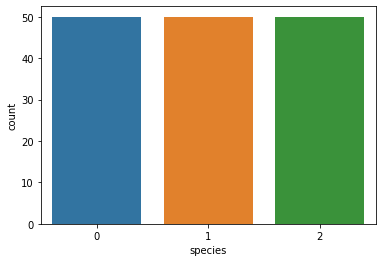

In [213]:
sns.countplot(df_iris['species'], label="count")
plt.show()

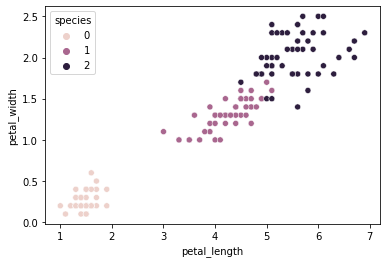

In [214]:
sns.scatterplot(x=df_iris.petal_length, y=df_iris.petal_width, hue=df_iris.species)

# Gaussian Naive Bayes


In [215]:
from sklearn.naive_bayes import GaussianNB
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [216]:
gnb = GaussianNB()
gnb.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [217]:
y_pred = gnb.predict(X_test)

In [218]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

print(classification_report(y_test, y_pred))
print("Confusion Matrix \n", confusion_matrix(y_test, y_pred))
print("\nAkurasi Naive Bayes: {:.2f}%".format(accuracy_score(y_test, y_pred) * 100))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       0.93      1.00      0.96        13
           2       1.00      0.83      0.91         6

    accuracy                           0.97        30
   macro avg       0.98      0.94      0.96        30
weighted avg       0.97      0.97      0.97        30

Confusion Matrix 
 [[11  0  0]
 [ 0 13  0]
 [ 0  1  5]]

Akurasi Naive Bayes: 96.67%


# K-Nearest Neighbors

In [219]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier()

dtc.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [220]:
y_pred2 = dtc.predict(X_test)

In [221]:
print(classification_report(y_test, y_pred2))
print("Confusion Matrix \n", confusion_matrix(y_test, y_pred2))
print("\nAkurasi Naive Bayes: {:.2f}%".format(accuracy_score(y_test, y_pred2) * 100))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00         6

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

Confusion Matrix 
 [[11  0  0]
 [ 0 13  0]
 [ 0  0  6]]

Akurasi Naive Bayes: 100.00%
